In [23]:
import pandas as pan
import matplotlib.pyplot as plotter
import seaborn as sns
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

from utils import get_predictions

In [24]:
matrix_data = pan.read_csv("Frozen_Dessert_Production.csv", parse_dates = True, index_col = "DATE")

In [25]:
matrix_data.columns = ["Sales"]

<Axes: xlabel='DATE', ylabel='Sales'>

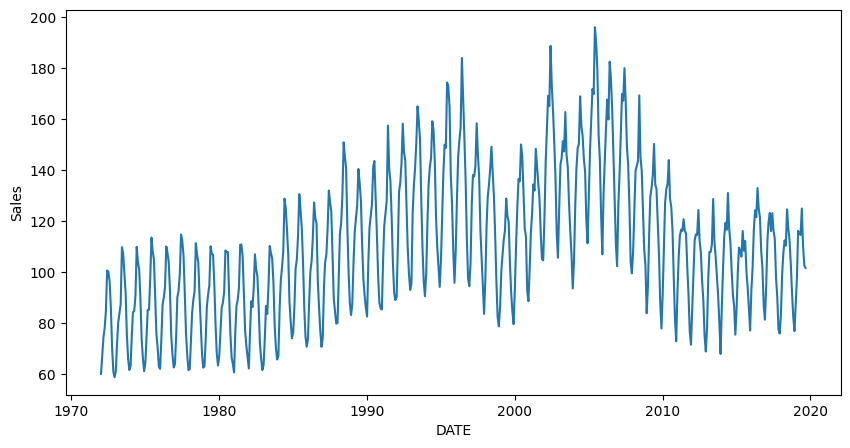

In [26]:
plotter.figure(figsize = (10, 5), dpi = 100)
sns.lineplot(x = matrix_data.index, y = matrix_data["Sales"])

In [27]:
train = matrix_data.iloc[: -30]
test = matrix_data.iloc[-30:]

In [28]:
mm_scaler = MinMaxScaler()
scaled_train = mm_scaler.fit_transform(train)
scaled_test = mm_scaler.transform(test)

In [29]:
generator = TimeseriesGenerator(scaled_train, scaled_train, batch_size = 1, length = 24)
validate_generator = TimeseriesGenerator(scaled_test, scaled_test, batch_size = 1, length = 24)

In [31]:
learner = Sequential()
learner.add(LSTM(units = 200, activation = "relu", input_shape = (24, 1)))
learner.add(Dense(64, activation = "relu"))
learner.add(Dense(128, activation = "relu"))
learner.add(Dense(1))
learner.compile(loss = "mse", optimizer = "adam")

In [32]:
learner.fit(generator, validation_data = validate_generator, epochs = 25, callbacks = [EarlyStopping(patience = 3)])

Epoch 1/25
519/519 [==============================] - 9s 11ms/step - loss: 0.0252 - val_loss: 0.0028
Epoch 2/25
519/519 [==============================] - 5s 10ms/step - loss: 0.0059 - val_loss: 0.0025
Epoch 3/25
519/519 [==============================] - 5s 10ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 4/25
519/519 [==============================] - 5s 10ms/step - loss: 0.0042 - val_loss: 0.0033
Epoch 5/25
519/519 [==============================] - 5s 10ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/25
519/519 [==============================] - 6s 11ms/step - loss: 0.0037 - val_loss: 0.0041


In [33]:
losses = pan.DataFrame(learner.history.history)

<Axes: >

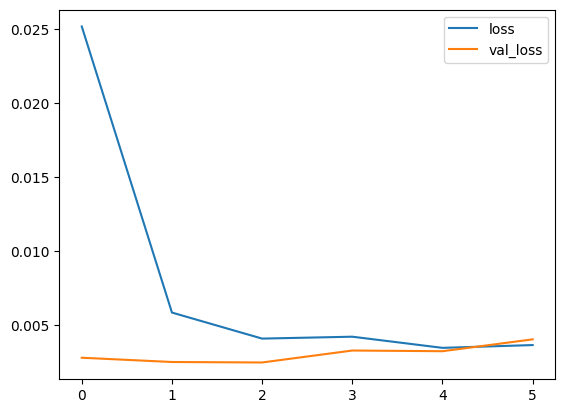

In [34]:
losses.plot()

In [35]:
#testing 
predictions = get_predictions(steps = 30, train_data = scaled_train, tf_learner = learner, batch_length = 24)

1/1 [==============================] - 0s 24ms/step


In [36]:
predictions = mm_scaler.inverse_transform(predictions)
test["predictions"] = predictions

C:\Users\omoke\AppData\Local\Temp\ipykernel_10908\1550553896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predictions"] = predictions


<Axes: xlabel='DATE'>

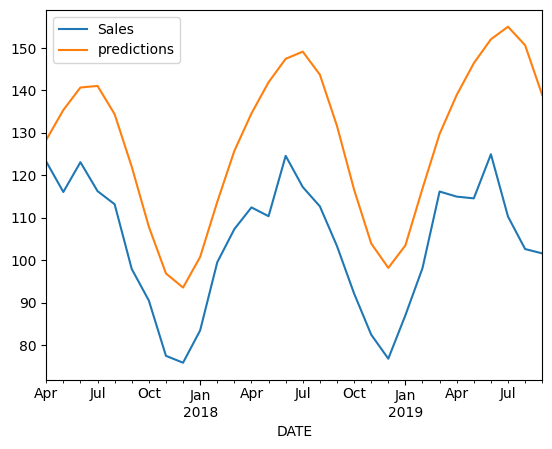

In [38]:
test.plot()